In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score


# Train Random Forest Model
Train a Random Forest classifier with 200 trees.
Evaluate Model Accuracy.
Show Feature Importances.
Display how important each technical indicator is in the model.

In [17]:
# 讀取資料
df = pd.read_excel("BTC_Technical_Indicators_with_Label.xlsx")
df.dropna(inplace=True)


# 選擇特徵與目標
features = [
    'RSI_14',
    'MACD',
    'MACD_signal',
    'MACD_diff',
    'SMA_5',
    'SMA_20',
    'EMA_12',
    'EMA_26',
    '%K',
    '%D',
    'OBV',
    'ATR',
    'BB_bbm',
    'BB_bbh',
    'BB_bbl',
    'BB_%b',
    'Volume'  # 原始成交量也可以加進來
]
X = df[features]
y = df["label_10d_up"]

# 切分訓練 / 測試集
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify = y
                                                    )#random_state 要調整好，輸出結果才一樣

# 訓練模型
model = RandomForestClassifier(n_estimators=200, random_state=42) #n_estimators越大越多棵樹，當n_estimators=200 機率= 0.849
model.fit(X_train, y_train)                                   # n_estimators =500 機率 =0.85  n_estimators =1000 機率 =0.92
y_pred = model.predict(X_test)

# 評估結果
print("模型準確率 Accuracy:", accuracy_score(y_test, y_pred))
print("\n 分類報告 classification report:\n", classification_report(y_test, y_pred))

# 特徵重要性
importances = model.feature_importances_
for name, score in zip(features, importances):
    print(f"{name}: {round(score * 100, 2)} %")

模型準確率 Accuracy: 0.8495821727019499

 分類報告 classification report:
               precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       159
         1.0       0.85      0.89      0.87       200

    accuracy                           0.85       359
   macro avg       0.85      0.85      0.85       359
weighted avg       0.85      0.85      0.85       359

RSI_14: 5.81 %
MACD: 6.36 %
MACD_signal: 7.57 %
MACD_diff: 5.92 %
SMA_5: 5.41 %
SMA_20: 5.48 %
EMA_12: 5.61 %
EMA_26: 6.44 %
%K: 4.29 %
%D: 4.63 %
OBV: 8.28 %
ATR: 7.53 %
BB_bbm: 5.45 %
BB_bbh: 6.75 %
BB_bbl: 5.57 %
BB_%b: 4.6 %
Volume: 4.32 %


#  Visualize Feature Importance

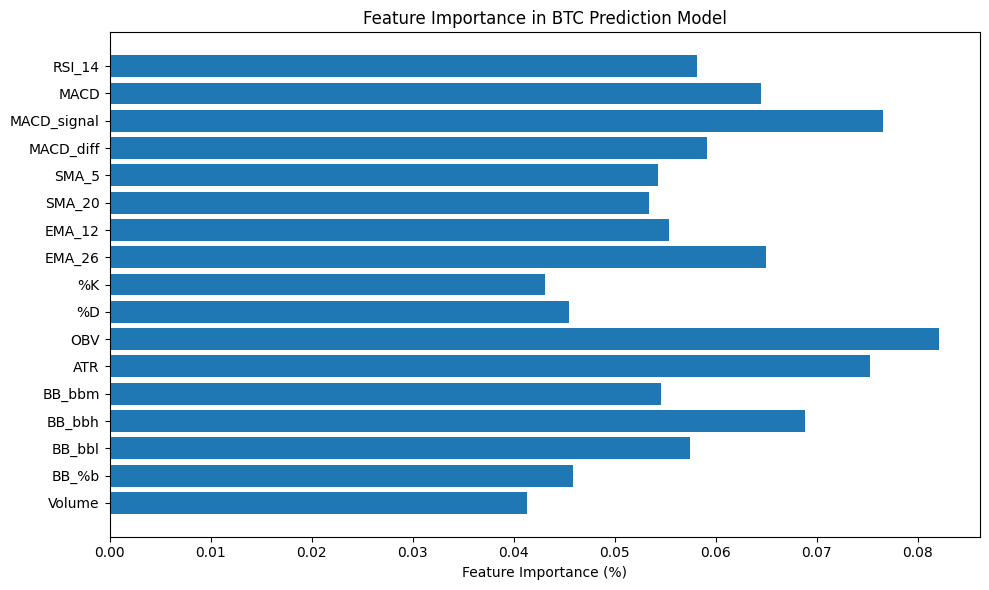

In [19]:
# 特徵重要性
importances = model.feature_importances_

# 繪圖
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance (%)")
plt.title("Feature Importance in BTC Prediction Model")
plt.gca().invert_yaxis()
plt.tight_layout()






# Tuning Hyperparameters with GridSearchCV

I use GridSearchCV to test different combinations of model parameters  
(like number of trees, tree depth, and minimum split size)  
to find the best setup that gives the highest accuracy.  
This helps improve the model's prediction performance on unseen data.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# 1. 載入資料與特徵
df = pd.read_excel("BTC_Technical_Indicators_with_Label.xlsx")
df.dropna(inplace=True)
features = [
    'RSI_14',
    'MACD',
    'MACD_signal',
    'MACD_diff',
    'SMA_5',
    'SMA_20',
    'EMA_12',
    'EMA_26',
    '%K',
    '%D',
    'OBV',
    'ATR',
    'BB_bbm',
    'BB_bbh',
    'BB_bbl',
    'BB_%b',
    'Volume'  # 原始成交量也可以加進來
]
X = df[features]
y = df["label_10d_up"]

# 2. 分割資料集
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify = y
                                                    )#random_state 要調整好，輸出結果才一樣

# 3. 建立模型
model = RandomForestClassifier(random_state=42)

# 4.全部跑一遍的參數範圍
param_grid = {
    'n_estimators': [200, 400, 500],         # 決策樹數量
    'max_depth': [ 10,20, None],          # 最大樹深
    'min_samples_split': [2,10,15],        # 節點最小樣本數
}

# 5. 使用 GridSearchCV 自動組合、交叉驗證（cv=5）
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)  # 多核心加速
grid_search.fit(X_train, y_train)

# 6. 輸出最佳參數與交叉驗證準確率
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# 7. 使用最佳模型在測試集上評估
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8529616724738677
Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       159
         1.0       0.85      0.89      0.87       200

    accuracy                           0.85       359
   macro avg       0.85      0.85      0.85       359
weighted avg       0.85      0.85      0.85       359



# Fine-Tuning the Model with More Parameters

After finding a good base model, we try more advanced settings like:
- number of minimum samples in a leaf node,
- feature selection methods (`sqrt`, `log2`, or all),
- and whether to use bootstrapping.

This step helps us explore small changes that may improve model performance further.


In [14]:
param_grid = {
    'n_estimators': [200],  # 目前找到的最佳值
    'max_depth': [None],    # 固定目前最好的
    'min_samples_split': [2],  # 固定
    'min_samples_leaf': [1, 2, 4, 5],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


# 5. 使用 GridSearchCV 自動組合、交叉驗證（cv=5）
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)  # 多核心加速
grid_search.fit(X_train, y_train)

# 6. 輸出最佳參數與交叉驗證準確率
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# 7. 使用最佳模型在測試集上評估
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8529616724738677
Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       159
         1.0       0.85      0.89      0.87       200

    accuracy                           0.85       359
   macro avg       0.85      0.85      0.85       359
weighted avg       0.85      0.85      0.85       359



# Randomized Search for Fast Parameter Tuning

 
I use RandomizedSearchCV to randomly try a set number of parameter combinations.  
This saves time and can still find a strong model setup.


In [8]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [3, 5, 10, None],
    'min_samples_split': randint(2, 10)
}

random_search = RandomizedSearchCV(model,
                                   param_distributions=param_dist,
                                   n_iter=20,  # 抽 20 組來試
                                   scoring='accuracy',
                                   cv=5,
                                   random_state=42,
                                   verbose=1,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 199}
Best Score: 0.845993031358885


# Visualize a Single Decision Tree from the Random Forest

Random Forest has many trees.  
Here I plot just the first one (`estimators_[0]`)  
to see how it makes decisions using features.  
I limit the depth to 3 so it’s easier to read.

In the plot:
- **Gini = 0.5** means the split is very mixed (like 50% up, 50% down).
- **Gini = 0.0** means the node is pure (all up or all down).


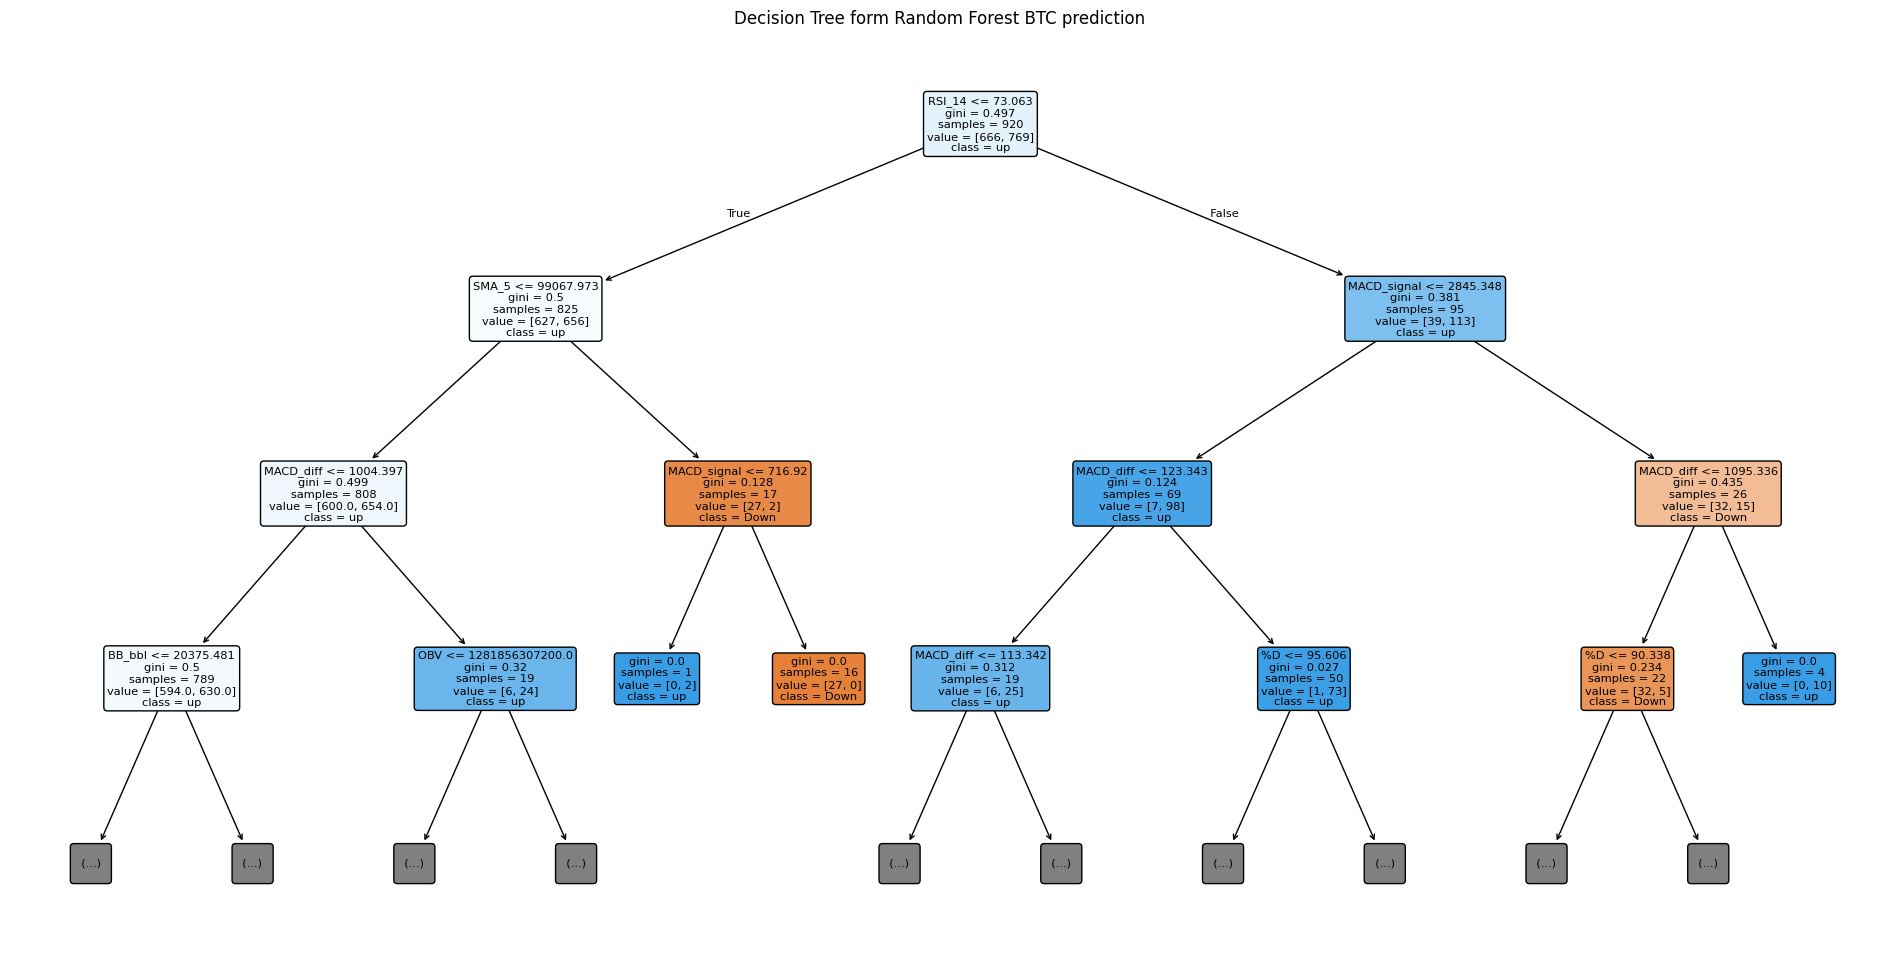

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
#draw decision Tree
estimator = model.estimators_[0] #因為很多所以只畫第0顆

plt.figure(figsize=(24,12))
plot_tree(estimator, feature_names=features,
          class_names=["Down","up"],
          filled=True,
          rounded=True,
          max_depth = 3) #限制深度3免得太大

plt.title("Decision Tree form Random Forest BTC prediction")
plt.show()
#下圖Gini(基尼不純度) 0.5最混亂(up,down 50%), 0最純

# Save the Trained Model

I use `joblib` to save the trained model as a `.pkl` file.  
This allows us to reuse the model later without retraining.


In [ ]:
import joblib

# 儲存模型
joblib.dump(model, "BTC_model.pkl")
print("Save as BTC_model.pkl")


模型已儲存為 BTC_model.pkl


# Make a Daily BTC Prediction Using the Trained Model

I use the latest 3 months of BTC price data to calculate technical indicators.  
Then, I use the trained model to predict if BTC will go up in the next 10 days.  
The model gives both the prediction (up or not up) and a confidence score.  
Based on the probability, we also give a trading suggestion (buy, avoid, or watch).


In [ ]:

import joblib
import ta

# 1. 抓取最近3個月 BTC 日資料
df = yf.download("BTC", period="3mo", interval="1d")
df.dropna(inplace=True)

# 2. 強制轉成 Series（避免技術指標報錯）
close = df['Close'].squeeze()
high = df['High'].squeeze()
low = df['Low'].squeeze()
volume = df['Volume'].squeeze()

# 3. 計算技術指標（與訓練時保持一致）
df['RSI_14'] = ta.momentum.RSIIndicator(close=close, window=14).rsi()
macd_calc = ta.trend.MACD(close=close)
df['MACD'] = macd_calc.macd()
df['MACD_signal'] = macd_calc.macd_signal()
df['MACD_diff'] = df['MACD'] - df['MACD_signal']
df['SMA_5'] = ta.trend.SMAIndicator(close=close, window=5).sma_indicator()
df['SMA_20'] = ta.trend.SMAIndicator(close=close, window=20).sma_indicator()
df['EMA_12'] = ta.trend.EMAIndicator(close=close, window=12).ema_indicator()
df['EMA_26'] = ta.trend.EMAIndicator(close=close, window=26).ema_indicator()
stoch = ta.momentum.StochasticOscillator(high=high, low=low, close=close)
df['%K'] = stoch.stoch()
df['%D'] = stoch.stoch_signal()
df['OBV'] = ta.volume.OnBalanceVolumeIndicator(close=close, volume=volume).on_balance_volume()
df['ATR'] = ta.volatility.AverageTrueRange(high=high, low=low, close=close).average_true_range()
bb = ta.volatility.BollingerBands(close=close, window=20, window_dev=2)
df['BB_bbm'] = bb.bollinger_mavg()
df['BB_bbh'] = bb.bollinger_hband()
df['BB_bbl'] = bb.bollinger_lband()
df['BB_%b'] = bb.bollinger_pband()

# 4. 清除NaN
df.dropna(inplace=True)

# 5. 準備最新一筆資料
latest_data = df.iloc[-1:]

# 6. 特徵欄位（需與訓練一致）
features = [
    'RSI_14', 'MACD', 'MACD_signal', 'MACD_diff',
    'SMA_5', 'SMA_20', 'EMA_12', 'EMA_26',
    '%K', '%D', 'OBV', 'ATR',
    'BB_bbm', 'BB_bbh', 'BB_bbl', 'BB_%b',
    'Volume'
]
X_latest = latest_data[features]

# 7. 載入模型並預測
model = joblib.load("BTC_model.pkl")
prediction = model.predict(X_latest)[0]
proba = model.predict_proba(X_latest)[0][1]


# 8. 輸出結果
if prediction == 1:
    print(f"Prediction: BTC may go up in the next 10 days (probability:：{round(proba * 100, 2)}%)")
else:
    print(f"Prediction: BTC may go down or stay flat in the next 10 days (probability:{round ((1-proba) * 100, 2)}%)")

if proba >= 0.6:
    print("suggest：Buy")
elif proba <= 0.4:
    print("suggest：avoid")
else:
    print("suggest：watch")


[*********************100%***********************]  1 of 1 completed

預測:未來10天  可能會上漲（機率：67.0%)
建議：考慮進場



c:\Temp\envs\web_scraping\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Temp\envs\web_scraping\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
